In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [24]:
hawk = pd.read_csv("C:/Users/welcome/Documents/Vishal/Hawks.csv")
hawk.head()

,Unnamed: 0,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,2,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,3,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,4,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,5,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Count')

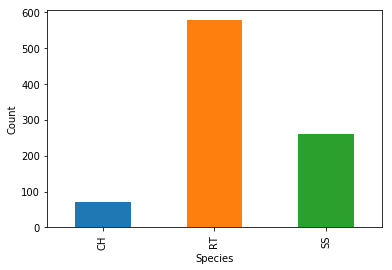

In [4]:
hawk.groupby('Species').size().plot(kind='bar')
plt.ylabel('Count')

In [5]:
hawk['Species'].value_counts()

RT    577
SS    261
CH     70
Name: Species, dtype: int64

In [6]:
hawk= hawk.replace(' ', np.NaN)

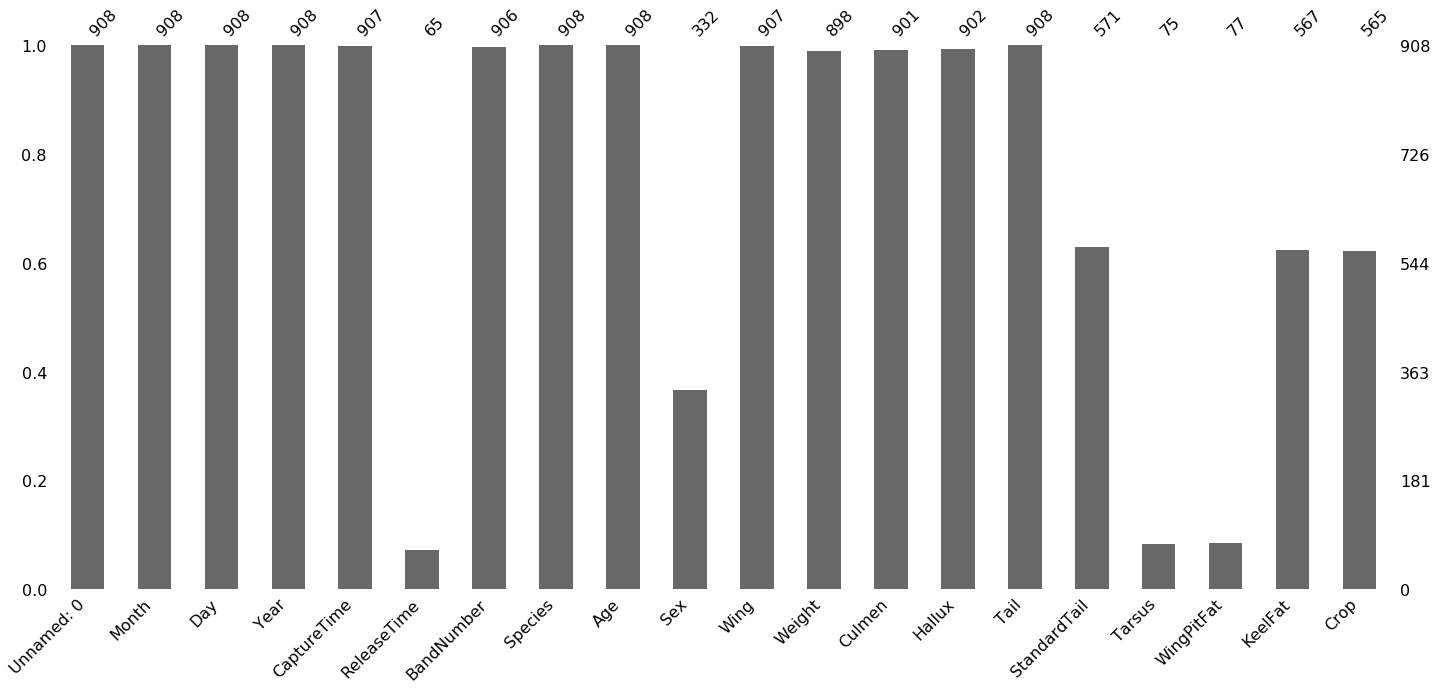

In [7]:
msno.bar(hawk)

In [8]:
print(hawk.describe())

       Unnamed: 0       Month         Day         Year        Wing  \
count   908.00000  908.000000  908.000000   908.000000  907.000000   
mean    454.50000    9.842511   15.740088  1998.253304  315.637486   
std     262.26132    0.685717    8.413164     3.454180   95.277591   
min       1.00000    8.000000    1.000000  1992.000000   37.200000   
25%     227.75000    9.000000    9.000000  1995.000000  202.000000   
50%     454.50000   10.000000   16.000000  1999.000000  370.000000   
75%     681.25000   10.000000   23.000000  2001.000000  390.000000   
max     908.00000   11.000000   31.000000  2003.000000  480.000000   

            Weight      Culmen      Hallux        Tail  StandardTail  \
count   898.000000  901.000000  902.000000  908.000000    571.000000   
mean    772.080178   21.801498   26.410865  198.831498    199.182137   
std     462.311760    7.284175   17.734704   36.824403     38.197755   
min      56.000000    8.600000    9.500000  119.000000    115.000000   
25%     1

In [9]:
hawk = hawk.drop('Tarsus', axis=1)
hawk = hawk.drop('WingPitFat', axis=1)
hawk = hawk.drop('ReleaseTime', axis=1)

In [10]:
missing_values_CH = hawk['Weight'][hawk['Species'] == 'CH'].isnull().sum()/len(hawk)*100
missing_values_CH

0.0

In [11]:
missing_values_RT = hawk['Weight'][hawk['Species'] == 'RT'].isnull().sum()/len(hawk)*100
missing_values_RT

0.5506607929515419

In [12]:
missing_values_SS = hawk['Weight'][hawk['Species'] == 'SS'].isnull().sum()/len(hawk)*100
missing_values_SS

0.5506607929515419

In [22]:
hawk['Weight'][hawk['Species'] == 'RT'].describe()

count     577.000000
mean     1094.430070
std       188.387235
min       101.000000
25%       980.000000
50%      1075.000000
75%      1210.000000
max      2030.000000
Name: Weight, dtype: float64

In [54]:
hawk['Weight'][hawk['Species'] == 'SS'].describe()

count     256.000000
mean      147.968750
std        80.652675
min        85.000000
25%       100.000000
50%       155.000000
75%       177.750000
max      1094.000000
Name: Weight, dtype: float64

In [25]:
test = hawk

In [28]:
(test['Weight'][test['Species']=='SS'])

4      170.0
25     100.0
28     180.0
39     100.0
40      88.0
52     134.0
64     100.0
67     100.0
68       NaN
82     194.0
83     159.0
84      90.0
97     168.0
98     146.0
99     108.0
100     94.0
102    188.0
103    154.0
106     94.0
111     91.0
120     89.0
121     97.0
124     93.0
127    103.0
128    151.0
129    101.0
140     95.0
141     89.0
142    195.0
143     93.0
       ...  
817     95.0
819    175.0
821    160.0
824    150.0
827    188.0
828     95.0
830     95.0
833    105.0
834    165.0
835    170.0
836    100.0
839    175.0
840    195.0
848    100.0
851    105.0
856    210.0
858     95.0
863    170.0
864    100.0
869     95.0
872     95.0
873    100.0
883    185.0
886    165.0
889    105.0
894    190.0
895    200.0
896    185.0
898    185.0
904    175.0
Name: Weight, Length: 261, dtype: float64

In [29]:
hawk.fillna((test['Weight'][test['Species']=='SS']).mean(), inplace = True)
hawk.fillna((test['Weight'][test['Species']=='RT']).mean(), inplace = True)
hawk.fillna((test['Weight'][test['Species']=='CH']).mean(), inplace = True)
# Notice 68 row in SS category in above and below cell

In [34]:
hawk['Weight'][hawk['Species'] == 'SS']

4      170.00000
25     100.00000
28     180.00000
39     100.00000
40      88.00000
52     134.00000
64     100.00000
67     100.00000
68     147.96875
82     194.00000
83     159.00000
84      90.00000
97     168.00000
98     146.00000
99     108.00000
100     94.00000
102    188.00000
103    154.00000
106     94.00000
111     91.00000
120     89.00000
121     97.00000
124     93.00000
127    103.00000
128    151.00000
129    101.00000
140     95.00000
141     89.00000
142    195.00000
143     93.00000
         ...    
817     95.00000
819    175.00000
821    160.00000
824    150.00000
827    188.00000
828     95.00000
830     95.00000
833    105.00000
834    165.00000
835    170.00000
836    100.00000
839    175.00000
840    195.00000
848    100.00000
851    105.00000
856    210.00000
858     95.00000
863    170.00000
864    100.00000
869     95.00000
872     95.00000
873    100.00000
883    185.00000
886    165.00000
889    105.00000
894    190.00000
895    200.00000
896    185.000

In [35]:
test.isnull().sum()

Unnamed: 0      0
Month           0
Day             0
Year            0
CaptureTime     0
ReleaseTime     0
BandNumber      0
Species         0
Age             0
Sex             0
Wing            0
Weight          0
Culmen          0
Hallux          0
Tail            0
StandardTail    0
Tarsus          0
WingPitFat      0
KeelFat         0
Crop            0
dtype: int64

In [84]:
def mean_category(x):
    print (x['Species'])
    print (x['Weight'])
    if x['Species']=='RT' and x['Weight'].isnan:
        return x['Weight'] = x['Weight'].mean()
    else:
        return 'test'

test = test.apply(mean_category)

SyntaxError: invalid syntax (<ipython-input-84-2155181ef2fd>, line 5)

In [79]:
test = hawk

In [80]:
test['Weight']

0       920.0
1       930.0
2       990.0
3       470.0
4       170.0
        ...  
903    1525.0
904     175.0
905     790.0
906     860.0
907    1290.0
Name: Weight, Length: 908, dtype: float64